🔹 First 5 Rows of Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

🔹 Plotting Pairplot for Data Exploration...


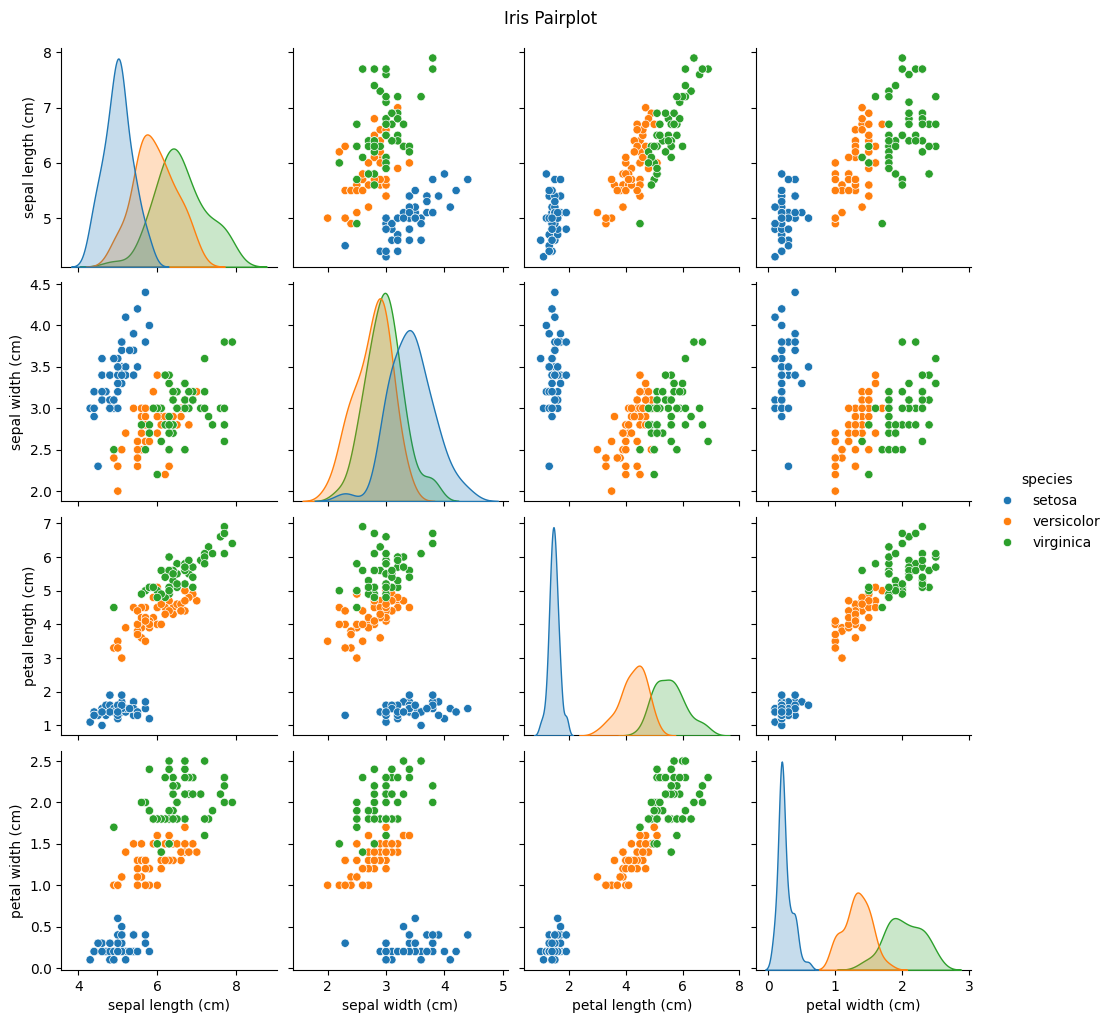


🔹 Correlation Heatmap:


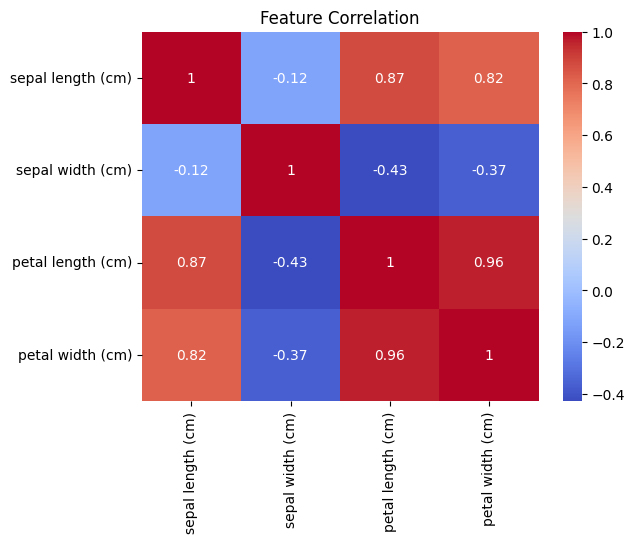


🔹 Accuracy Score: 1.0

🔹 Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

🔹 Confusion Matrix:


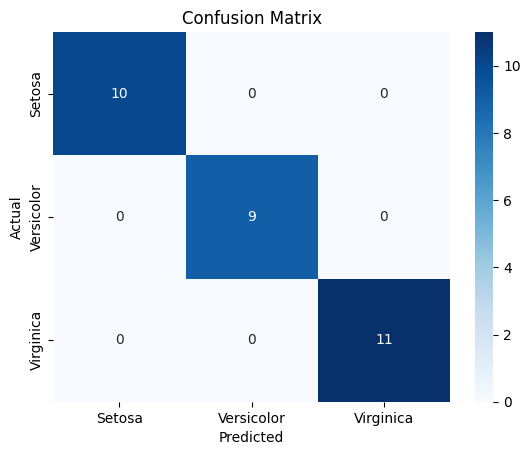

In [2]:
# ✨ Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 📥 Load the Dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# 👀 Display First Few Rows
print("🔹 First 5 Rows of Dataset:")
print(df.head())

# 📊 Data Visualization
print("\n🔹 Plotting Pairplot for Data Exploration...")
sns.pairplot(df, hue="species")
plt.suptitle("Iris Pairplot", y=1.02)
plt.show()

# 🔥 Correlation Heatmap (FIXED)
print("\n🔹 Correlation Heatmap:")
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# ✂️ Splitting the Data
X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🧠 Training the Model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# 🔮 Making Predictions
y_pred = model.predict(X_test)

# ✅ Model Evaluation
print("\n🔹 Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))

# 📉 Confusion Matrix
print("🔹 Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g',
            xticklabels=['Setosa', 'Versicolor', 'Virginica'],
            yticklabels=['Setosa', 'Versicolor', 'Virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()
